## Introduction

### Problem Statement

Bus routes with a standard scheduling that does not account for peak times and trough times is inefficient. As a result, some buses are underutilized at times and some buses are full. Different routes also might have different peak times and different times they are underutilized. There is a need for bus companies to optimize scheduling using real data of passengers and traffic flow in order to optimize bus frequency per hour to fully utilize it's workforce. Thus, we propose a fuzzy logic smart bus scheduling system that makes recommendations based on real-time data. When passenger capacity is recorded through QR ticketing and the speed of the bus is recorded using GPS, these inputs feed into the system to output a recommendation of the bus frequency. Then, there are 2 ways for the bus company to optimize scheduling:

1. Adjust schedule dynamically based on real-time

The bus company can run the system during operational hours and adjust the bus frequency for a route in real-time.However, this method requires an extremely flexible workforce as it requires buses to be deployed and withheld at any given moment. 

Thus, a more balanced and plausible approach would be number 2:

2. Develop a schedule based on historical data of recommendations

The bus company can run the standard scheduling for a month while also running the fuzzy logic smart bus scheduling recommendation system. Then, they are able to average out the recommended bus frequencies and develop a schedule that is optimized for bus utilization based on past recommendations. This approach does not require the workforce to be as deployable as the first, while still optimizing for peaks and troughs in bus utilization.

### Objectives

1. To create a Mamdani fuzzy logic smart bus scheduling system which takes the number of passengers and speed of bus as input, and outputs the recommended bus frequency.
2. To optimize bus scheduling such that all buses are utilized according to the peaks and troughs of bus utilization
3. To reduce the number of buses with below average utilization
4. To deploy more buses during peak times to reduce waiting time for passengers

### Inputs and Outputs

#### Inputs:
- Number of passengers
- Speed of bus

#### Output:
- Bus Frequency

### Set of Rules

NOTE: We use bus speed as a measurement of traffic congestion, that is if the bus speed is slow, it means traffic is congested

We designed these set of rules based on bus utilization instead of reducing wait times, thus passenger demand is more taken into account. Speed of bus only ranges from 0-90 km/h as per speed limits on heavy vehicles.

- IF Passenger Demand is High AND Speed of Bus is Slow,     THEN 'Bus Frequency' is Very High
- IF Passenger Demand is High AND Speed of Bus is Medium,   THEN 'Bus Frequency' is High
- IF Passenger Demand is High AND Speed of Bus is Fast,     THEN 'Bus Frequency' is High
- IF Passenger Demand is Medium,                            THEN 'Bus Frequency' is Medium
- IF Passenger Demand is Low AND Speed of Bus is Slow,      THEN 'Bus Frequency' is Low
- IF Passenger Demand is Low AND Speed of Bus is Medium,    THEN 'Bus Frequency' is Low
- IF Passenger Demand is Low AND Speed of Bus is Fast,      THEN 'Bus Frequency' is Very Low

### System Design

## Mamdani Smart Bus Frequency Recommendation System

### Imports

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd

### Inputs
- Number of passengers
- Speed of bus

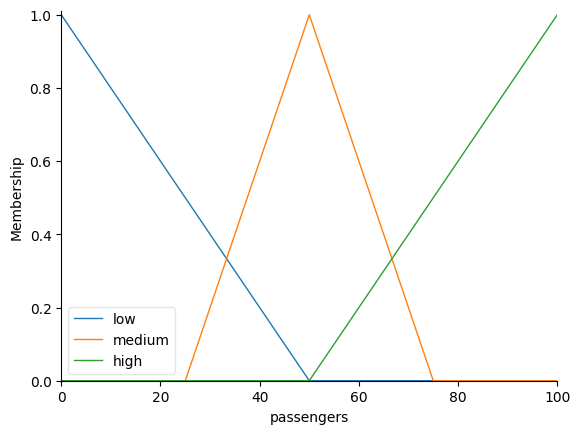

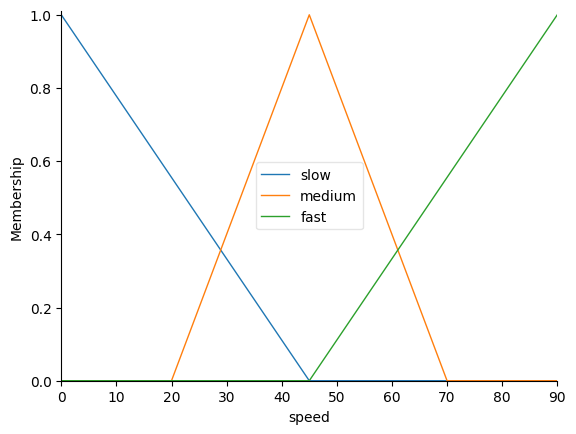

In [31]:
# Number of passengers
passengers = ctrl.Antecedent(np.arange(0, 101, 1), 'passengers')  # Assuming a range of 0 to 100 passengers
passengers['low'] = fuzz.trimf(passengers.universe, [0, 0, 50])
passengers['medium'] = fuzz.trimf(passengers.universe, [25, 50, 75])
passengers['high'] = fuzz.trimf(passengers.universe, [50, 100, 100])

# Speed of bus
speed = ctrl.Antecedent(np.arange(0, 91, 1), 'speed')  # Assuming a range of 0 to 90 km/h
speed['slow'] = fuzz.trimf(speed.universe, [0, 0, 45])
speed['medium'] = fuzz.trimf(speed.universe, [20, 45, 70])
speed['fast'] = fuzz.trimf(speed.universe, [45, 90, 90])

passengers.view()
speed.view()

### Output
Bus Frequency

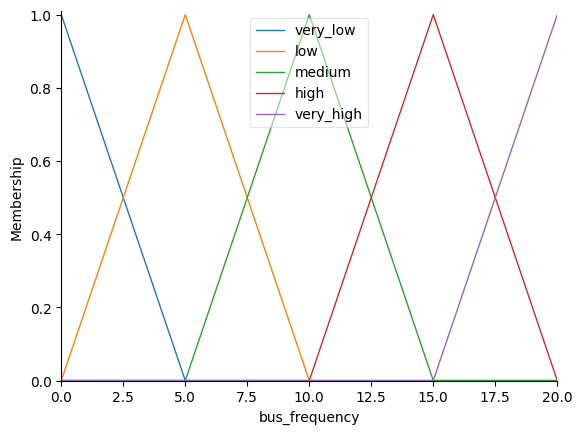

In [32]:
# Bus Frequency
bus_frequency = ctrl.Consequent(np.arange(0, 21, 1), 'bus_frequency')  # Buses per hour
bus_frequency['very_low'] = fuzz.trimf(bus_frequency.universe, [0, 0, 5])
bus_frequency['low'] = fuzz.trimf(bus_frequency.universe, [0, 5, 10])
bus_frequency['medium'] = fuzz.trimf(bus_frequency.universe, [5, 10, 15])
bus_frequency['high'] = fuzz.trimf(bus_frequency.universe, [10, 15, 20])
bus_frequency['very_high'] = fuzz.trimf(bus_frequency.universe, [15, 20, 20])

bus_frequency.view()

### Fuzzy Rules

In [69]:
# Define the fuzzy rules based on both inputs
rule1 = ctrl.Rule(passengers['high'] & speed['slow'], bus_frequency['very_high'])
rule2 = ctrl.Rule(passengers['high'] & speed['medium'], bus_frequency['high'])
rule3 = ctrl.Rule(passengers['high'] & speed['fast'], bus_frequency['high'])
rule4 = ctrl.Rule(passengers['medium'], bus_frequency['medium'])
rule5 = ctrl.Rule(passengers['low'] & speed['slow'], bus_frequency['low'])
rule6 = ctrl.Rule(passengers['low'] & speed['medium'], bus_frequency['low'])
rule7 = ctrl.Rule(passengers['low'] & speed['fast'], bus_frequency['very_low'])

### Defuzzification and sample testing

Defuzzification is conducted using centroid method.

#### Low passenger demand, low traffic congestion (high speed)

Recommended Bus Frequency: 1.8571428571428572


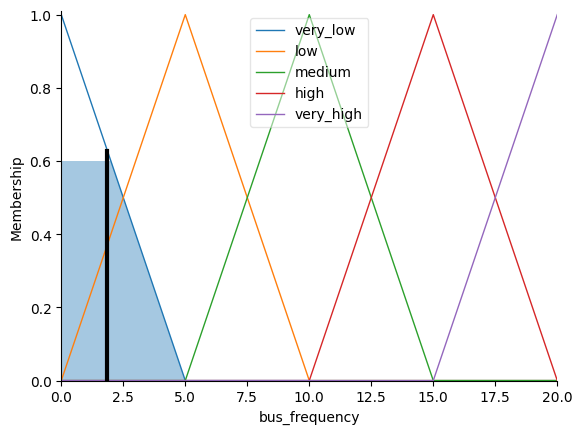

In [72]:
# Create the control system
bus_scheduling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4 ,rule5, rule6, rule7])

# Simulation
bus_scheduling_1 = ctrl.ControlSystemSimulation(bus_scheduling_ctrl)

# Test with sample inputs
bus_scheduling_1.input['passengers'] = 20  # Example input for low passenger demand
bus_scheduling_1.input['speed'] = 90  # Example input for faster bus speed (within the range of 0 to 90 km/h)

# Compute the output
bus_scheduling_1.compute()

# Output the bus frequency value
print("Recommended Bus Frequency:", bus_scheduling_1.output['bus_frequency'])

# Plot the result
bus_frequency.view(sim=bus_scheduling_1)

# Show plots
plt.show()



#### High passenger demand, high traffic congestion (slow speed)

Recommended Bus Frequency: 18.105413105413106


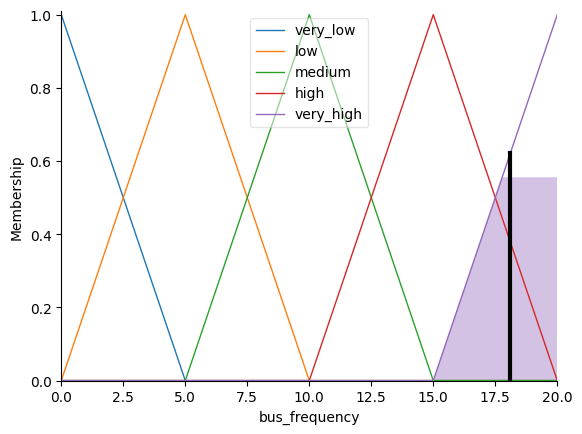

In [67]:
# Simulation
bus_scheduling_2 = ctrl.ControlSystemSimulation(bus_scheduling_ctrl)

# Test with sample inputs
bus_scheduling_2.input['passengers'] = 100  # Example input for high passenger demand
bus_scheduling_2.input['speed'] = 20  # Example input for slow bus speed (within the range of 0 to 90 km/h)

# Compute the output
bus_scheduling_2.compute()

# Output the bus frequency value
print("Recommended Bus Frequency:", bus_scheduling_2.output['bus_frequency'])

# Plot the result
bus_frequency.view(sim=bus_scheduling_2)

# Show plots
plt.show()



#### High passenger demand, low traffic congestion (high speed)

Recommended Bus Frequency: 15.0


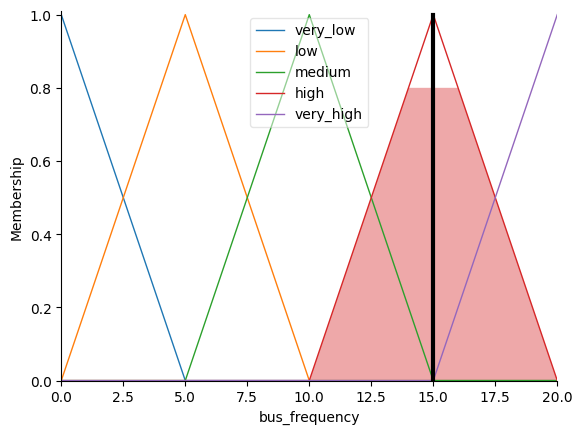

In [73]:
# Simulation
bus_scheduling_3 = ctrl.ControlSystemSimulation(bus_scheduling_ctrl)

# Test with sample inputs
bus_scheduling_3.input['passengers'] = 90  # Example input for high passenger demand
bus_scheduling_3.input['speed'] = 90  # Example input for faster bus speed (within the range of 0 to 90 km/h)

# Compute the output
bus_scheduling_3.compute()

# Output the bus frequency value
print("Recommended Bus Frequency:", bus_scheduling_3.output['bus_frequency'])

# Plot the result
bus_frequency.view(sim=bus_scheduling_3)

# Show plots
plt.show()



#### Medium passenger demand, medium traffic congestion (medium speed)

Recommended Bus Frequency: 10.000000000000002


c:\Projects\WID3007_assignment\.conda\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


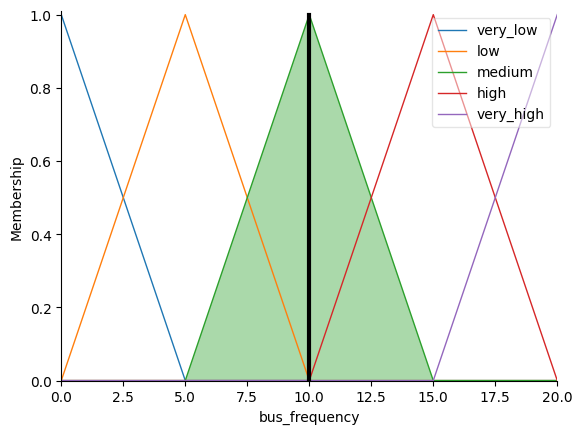

In [74]:
# Simulation
bus_scheduling_4 = ctrl.ControlSystemSimulation(bus_scheduling_ctrl)

# Test with sample inputs
bus_scheduling_4.input['passengers'] = 50  # Example input for medium passenger average
bus_scheduling_4.input['speed'] = 45  # Example input for medium bus speed (within the range of 0 to 90 km/h)

# Compute the output
bus_scheduling_4.compute()
# Output the bus frequency value
print("Recommended Bus Frequency:", bus_scheduling_4.output['bus_frequency'])

# Plot the result
bus_frequency.view(sim=bus_scheduling_4)

# Show plots
plt.show()



## Test Results

Using generated data of a sample bus schedule data containing number of passengers and speed of bus, we generate an example of an optimal bus schedule

Assume Bus Company A has 50 buses. 10 buses are assigned per hour for each route of a total of 5 routes. Some buses are underutilized, and at times some buses are always full. Bus Company A decides to optimize it's scheduling by taking into account the passenger demand and traffic congestion of times at a certain route to free up some resources for other routes that are packed. Inside "sample_bus_schedule_data.xlsx" is the inputs that are acquired from sensors for a week of a certain bus route. Bus Company A uses this fuzzy logic system to record the recommended bus frequency and free up resources for other routes that may be used more often. In reality, the system should be adjusted for how many buses the company has and the data should be taken within the hour and averaged out.

ASSUMPTIONS:

- Average passengers per bus is 50
- Average speed of bus is 45
- Bus company has 5 routes and 50 buses available, currently 10 buses per hour per route
- Bus uses QR tickets for entry and exit to acquire passenger capacity
- Bus is equipped with GPS to track speed of bus
- Sample bus data is a generated example based on observation and not actual data

In [99]:
# Simulation
bus_scheduling_demo = ctrl.ControlSystemSimulation(bus_scheduling_ctrl)

# Load the Excel sheet
file_path = 'sample_bus_schedule_data.xlsx'
df = pd.read_excel(file_path)

# Placeholder function to mimic the fuzzy logic output computation
def compute_fuzzy_logic_output(passengers, speed):
    # Test with sample inputs
    bus_scheduling_demo.input['passengers'] = passengers  # Example input for medium passenger average
    bus_scheduling_demo.input['speed'] = speed  # Example input for medium bus speed (within the range of 0 to 90 km/h)

    # Compute the output
    bus_scheduling_demo.compute()
    ans = bus_scheduling_demo.output['bus_frequency']
    bus_scheduling_demo.reset()
    return ans

# Iterating through each row and computing fuzzy logic output
outputs = []
for _, row in df.iterrows():
    # Extract the number of passengers and bus speed from the row
    passengers = row['Number of Passengers']
    speed = row['Speed of Bus (km/h)']

    # Compute the fuzzy logic output using the placeholder function
    outputs.append(compute_fuzzy_logic_output(passengers, speed))

# Create a new DataFrame with the required columns and the computed 'Bus Frequency'
new_df = df[['Date', 'Day', 'Time']].copy()
new_df['Bus Frequency'] = outputs

# Save the new DataFrame to an Excel file
new_file_path = 'bus_frequency_recommendation_data.xlsx'
new_df.to_excel(new_file_path, index=False)


This is the plot of passenger demand from Monday to Friday. As seen, there is a recurring pattern where during early hours and during times where work ends, there is a spike in passenger demand. If Company A uses a constant 10 buses per hour throughout the day, it would result in underutilized buses during mid-day and potentially overcrowding during peak times.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

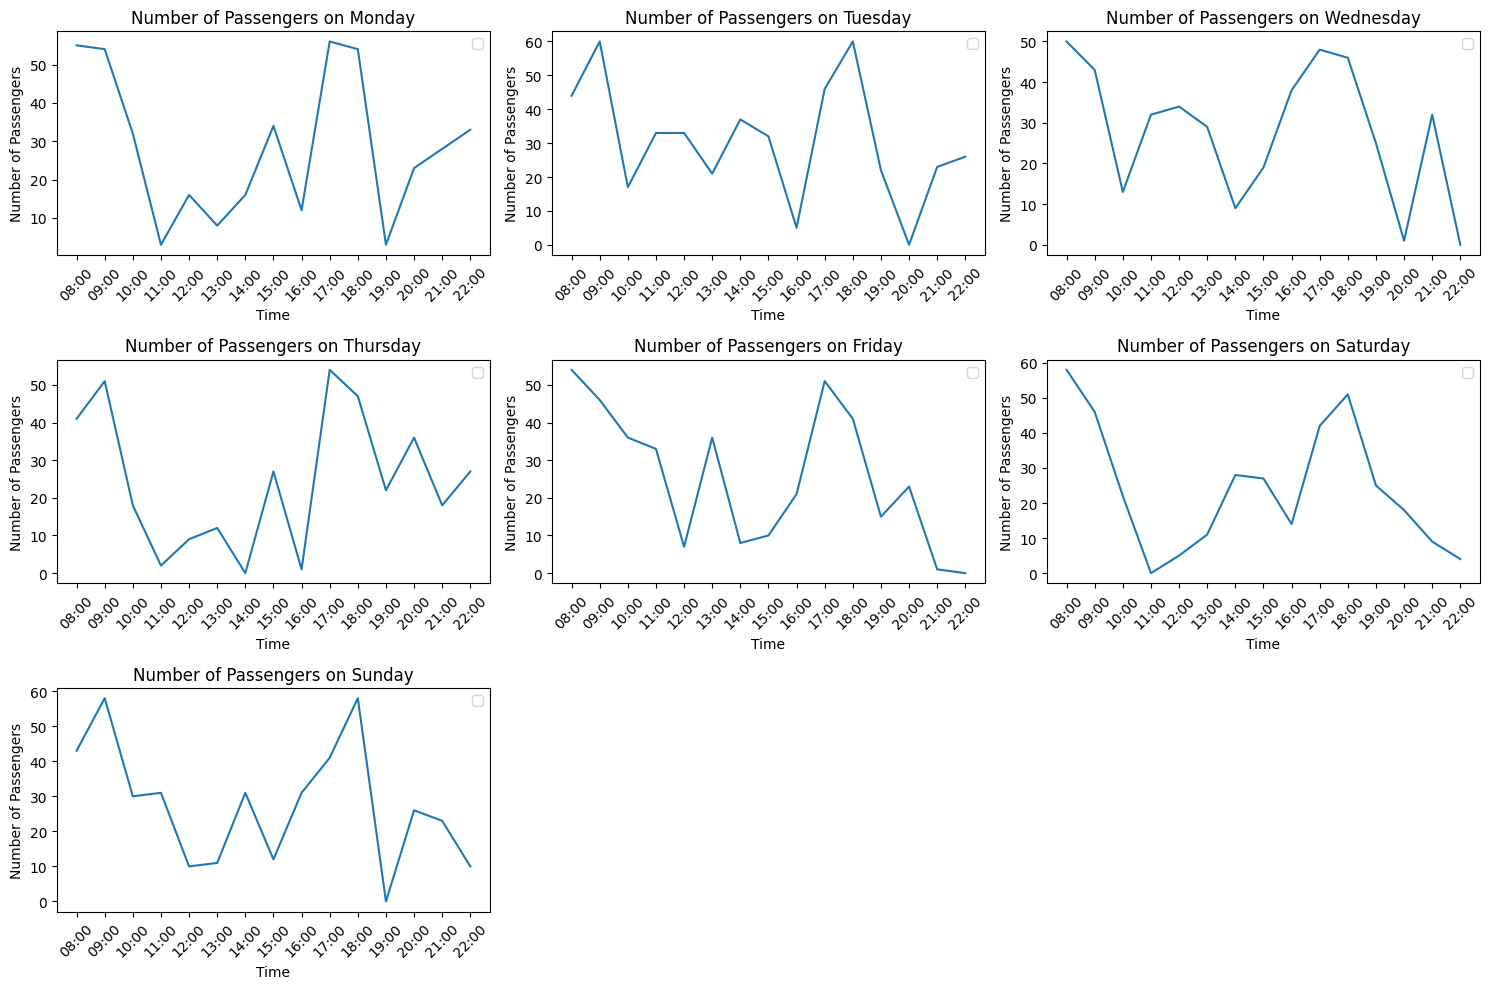

In [122]:
# Load the Excel sheet
file_path = 'sample_bus_schedule_data.xlsx'
df = pd.read_excel(file_path)

# Convert 'Date' and 'Time' columns to a single datetime column for easier plotting
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Set 'DateTime' as the index of the dataframe
df.set_index('DateTime', inplace=True)

# Plotting separate line graphs for each day of the week
days_of_week = df['Day'].unique()

plt.figure(figsize=(15, 10))

for i, day in enumerate(days_of_week, start=1):
    # Selecting data for each day
    day_data = df[df['Day'] == day]
    
    # Create a subplot for each day
    plt.subplot(3, 3, i)
    plt.plot(day_data['Time'], day_data['Number of Passengers'])
    
    # Formatting the plot
    plt.xlabel('Time')
    plt.ylabel('Number of Passengers')
    plt.title(f'Number of Passengers on {day}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()

# Show the plots
plt.show()


Similarly, we can see similar patterns for the traffic congestion, but since we are using measurement of bus speed to measure traffic congestion, the pattern is reversed.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

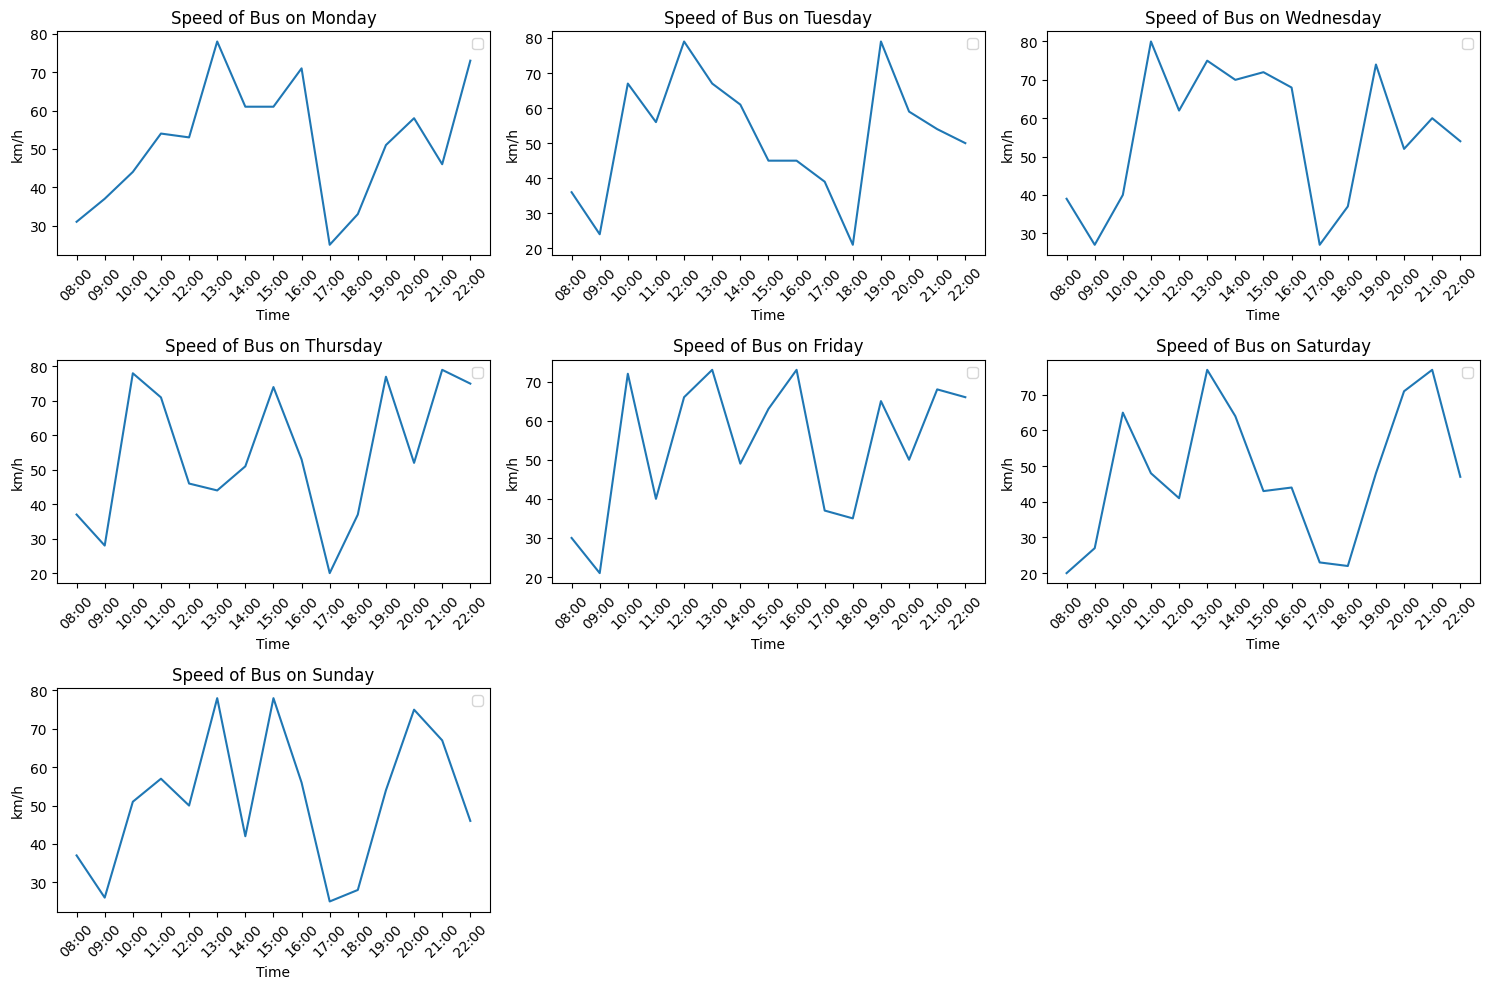

In [123]:
# Load the Excel sheet
file_path = 'sample_bus_schedule_data.xlsx'
df = pd.read_excel(file_path)

# Convert 'Date' and 'Time' columns to a single datetime column for easier plotting
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Set 'DateTime' as the index of the dataframe
df.set_index('DateTime', inplace=True)

# Plotting separate line graphs for each day of the week
days_of_week = df['Day'].unique()

plt.figure(figsize=(15, 10))

for i, day in enumerate(days_of_week, start=1):
    # Selecting data for each day
    day_data = df[df['Day'] == day]
    
    # Create a subplot for each day
    plt.subplot(3, 3, i)
    plt.plot(day_data['Time'], day_data['Speed of Bus (km/h)'])
    
    # Formatting the plot
    plt.xlabel('Time')
    plt.ylabel('km/h')
    plt.title(f'Speed of Bus on {day}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()

# Show the plots
plt.show()


Taking into account this data, the new optimized bus schedule increases it's frequency recommendation during peak times and reduces it's frequency recommendation during low times.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

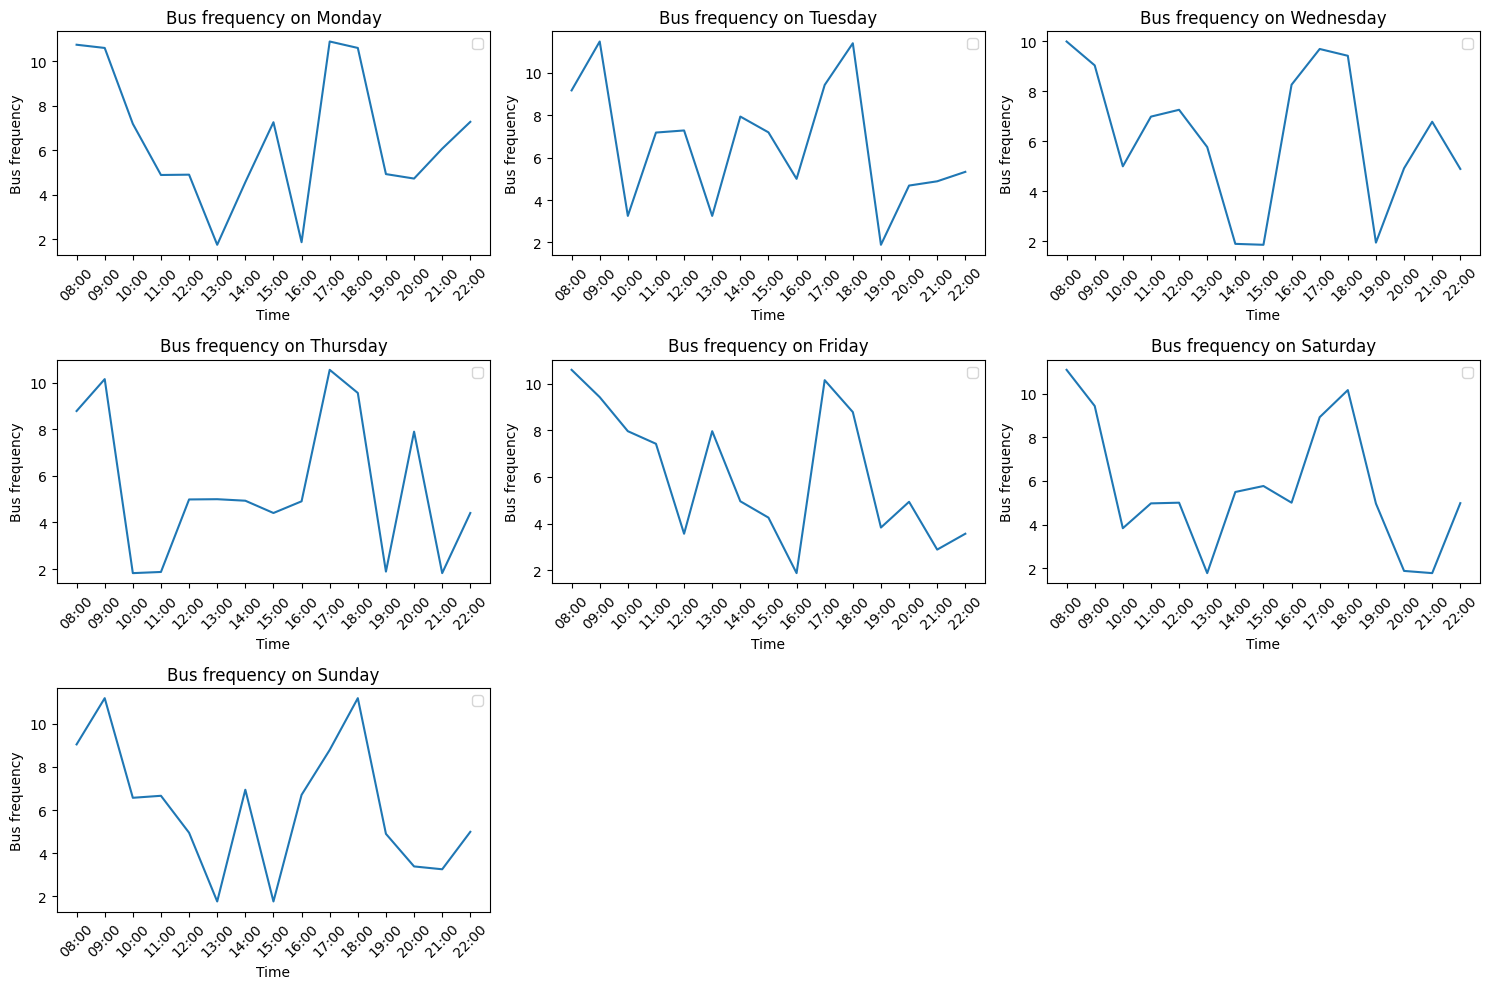

In [124]:
# Load the Excel sheet
file_path = 'bus_frequency_recommendation_data.xlsx'
df = pd.read_excel(file_path)

# Convert 'Date' and 'Time' columns to a single datetime column for easier plotting
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Set 'DateTime' as the index of the dataframe
df.set_index('DateTime', inplace=True)

# Plotting separate line graphs for each day of the week
days_of_week = df['Day'].unique()

plt.figure(figsize=(15, 10))

for i, day in enumerate(days_of_week, start=1):
    # Selecting data for each day
    day_data = df[df['Day'] == day]
    
    # Create a subplot for each day
    plt.subplot(3, 3, i)
    plt.plot(day_data['Time'], day_data['Bus Frequency'])
    
    # Formatting the plot
    plt.xlabel('Time')
    plt.ylabel('Bus frequency')
    plt.title(f'Bus frequency on {day}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()

# Show the plots
plt.show()
